In [ ]:
#### This is a simple script:
 - to use rasterio to open .bil file. 
 - do some basic calculations.
 - use rasterio to write a tiff file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import rasterio
import rasterio.plot as rioplot
import os
from osgeo import gdal
import shapefile
import shapely.geometry as shp
from rasterio import mask

In [2]:
# Learning Rasterio, Opening PRISM data in rasterio and creating arrays

year = np.arange(2013,2018)
month = np.arange(1,13)

prism_array = np.zeros([year.shape[0],month.shape[0],621,1405], dtype=np.float)

prism_diff1 = np.zeros([621,1405], dtype=np.float) 
prism_diff2 = np.zeros([621,1405], dtype=np.float) 

for yy in np.arange(year.shape[0]):
    for mm in np.arange(month.shape[0]):
        
# Reading Monthly Data   
        if(mm > 8):
            prism_path = rasterio.open('../data/PRISM_ppt_stable_4kmM3_{}{}_bil.bil'.format(year[yy],month[mm]))
        else:
            prism_path = rasterio.open('../data/PRISM_ppt_stable_4kmM3_{}0{}_bil.bil'.format(year[yy],month[mm]))

#Specifying nodata  
        prism_nodata = -9999
        prism_array[yy,mm,:,:] = np.array(prism_path.read())

#Changing nodata to nan  
        prism_array[prism_array == prism_nodata] = np.nan
        prism_ds = None



[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2013 2014 2015 2016 2017]


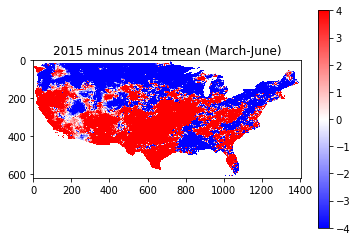

In [4]:
# Calculating seasonal mean basic differences
pr_2014 = np.zeros([month.shape[0],621,1405], dtype=np.float)
pr_2015 = np.zeros([month.shape[0],621,1405], dtype=np.float)
pr_2016 = np.zeros([month.shape[0],621,1405], dtype=np.float)

pr_2014[0:4,:,:] = prism_array[0,8:,:,:]
pr_2014[4:,:,:] = prism_array[1,0:8,:,:]

pr_2015[0:4,:,:] = prism_array[1,8:,:,:]
pr_2015[4:,:,:] = prism_array[2,0:8,:,:]

pr_2016[0:4,:,:] = prism_array[2,8:,:,:]
pr_2016[4:,:,:] = prism_array[3,0:8,:,:]

prism_seasonalmean2014 = np.mean(pr_2014,0)
prism_seasonalmean2015 = np.mean(pr_2015,0)
prism_seasonalmean2016 = np.mean(pr_2016,0)

prism_diff1[:,:] = prism_seasonalmean2015[:,:] - prism_seasonalmean2014[:,:]
prism_diff2[:,:] = prism_seasonalmean2015[:,:] - prism_seasonalmean2016[:,:]

plt.imshow(prism_diff1[:,:], cmap='bwr',vmin = -4, vmax = 4)
plt.title('2015 minus 2014 tmean (March-June)')

plt.colorbar()
plt.show()



In [6]:
original_image = rasterio.open('../data/PRISM_tmean_stable_4kmM2_201404_bil.bil')
# Writing tiff files for further processing

with rasterio.open("../interimfiles/prism_diff_pr_2015-2014.tif", 'w', driver='GTiff', height=prism_diff1.shape[0],
            width=prism_diff1.shape[1], count=1, dtype=prism_diff1.dtype,
            crs=original_image.crs, transform=original_image.transform) as dest:
    dest.write(prism_diff1[:,:],1)
    
with rasterio.open("../interimfiles/prism_diff_pr_2015-2016.tif", 'w', driver='GTiff', height=prism_diff2.shape[0],
            width=prism_diff2.shape[1], count=1, dtype=prism_diff2.dtype,
            crs=original_image.crs, transform=original_image.transform) as dest:
    dest.write(prism_diff2[:,:],1)

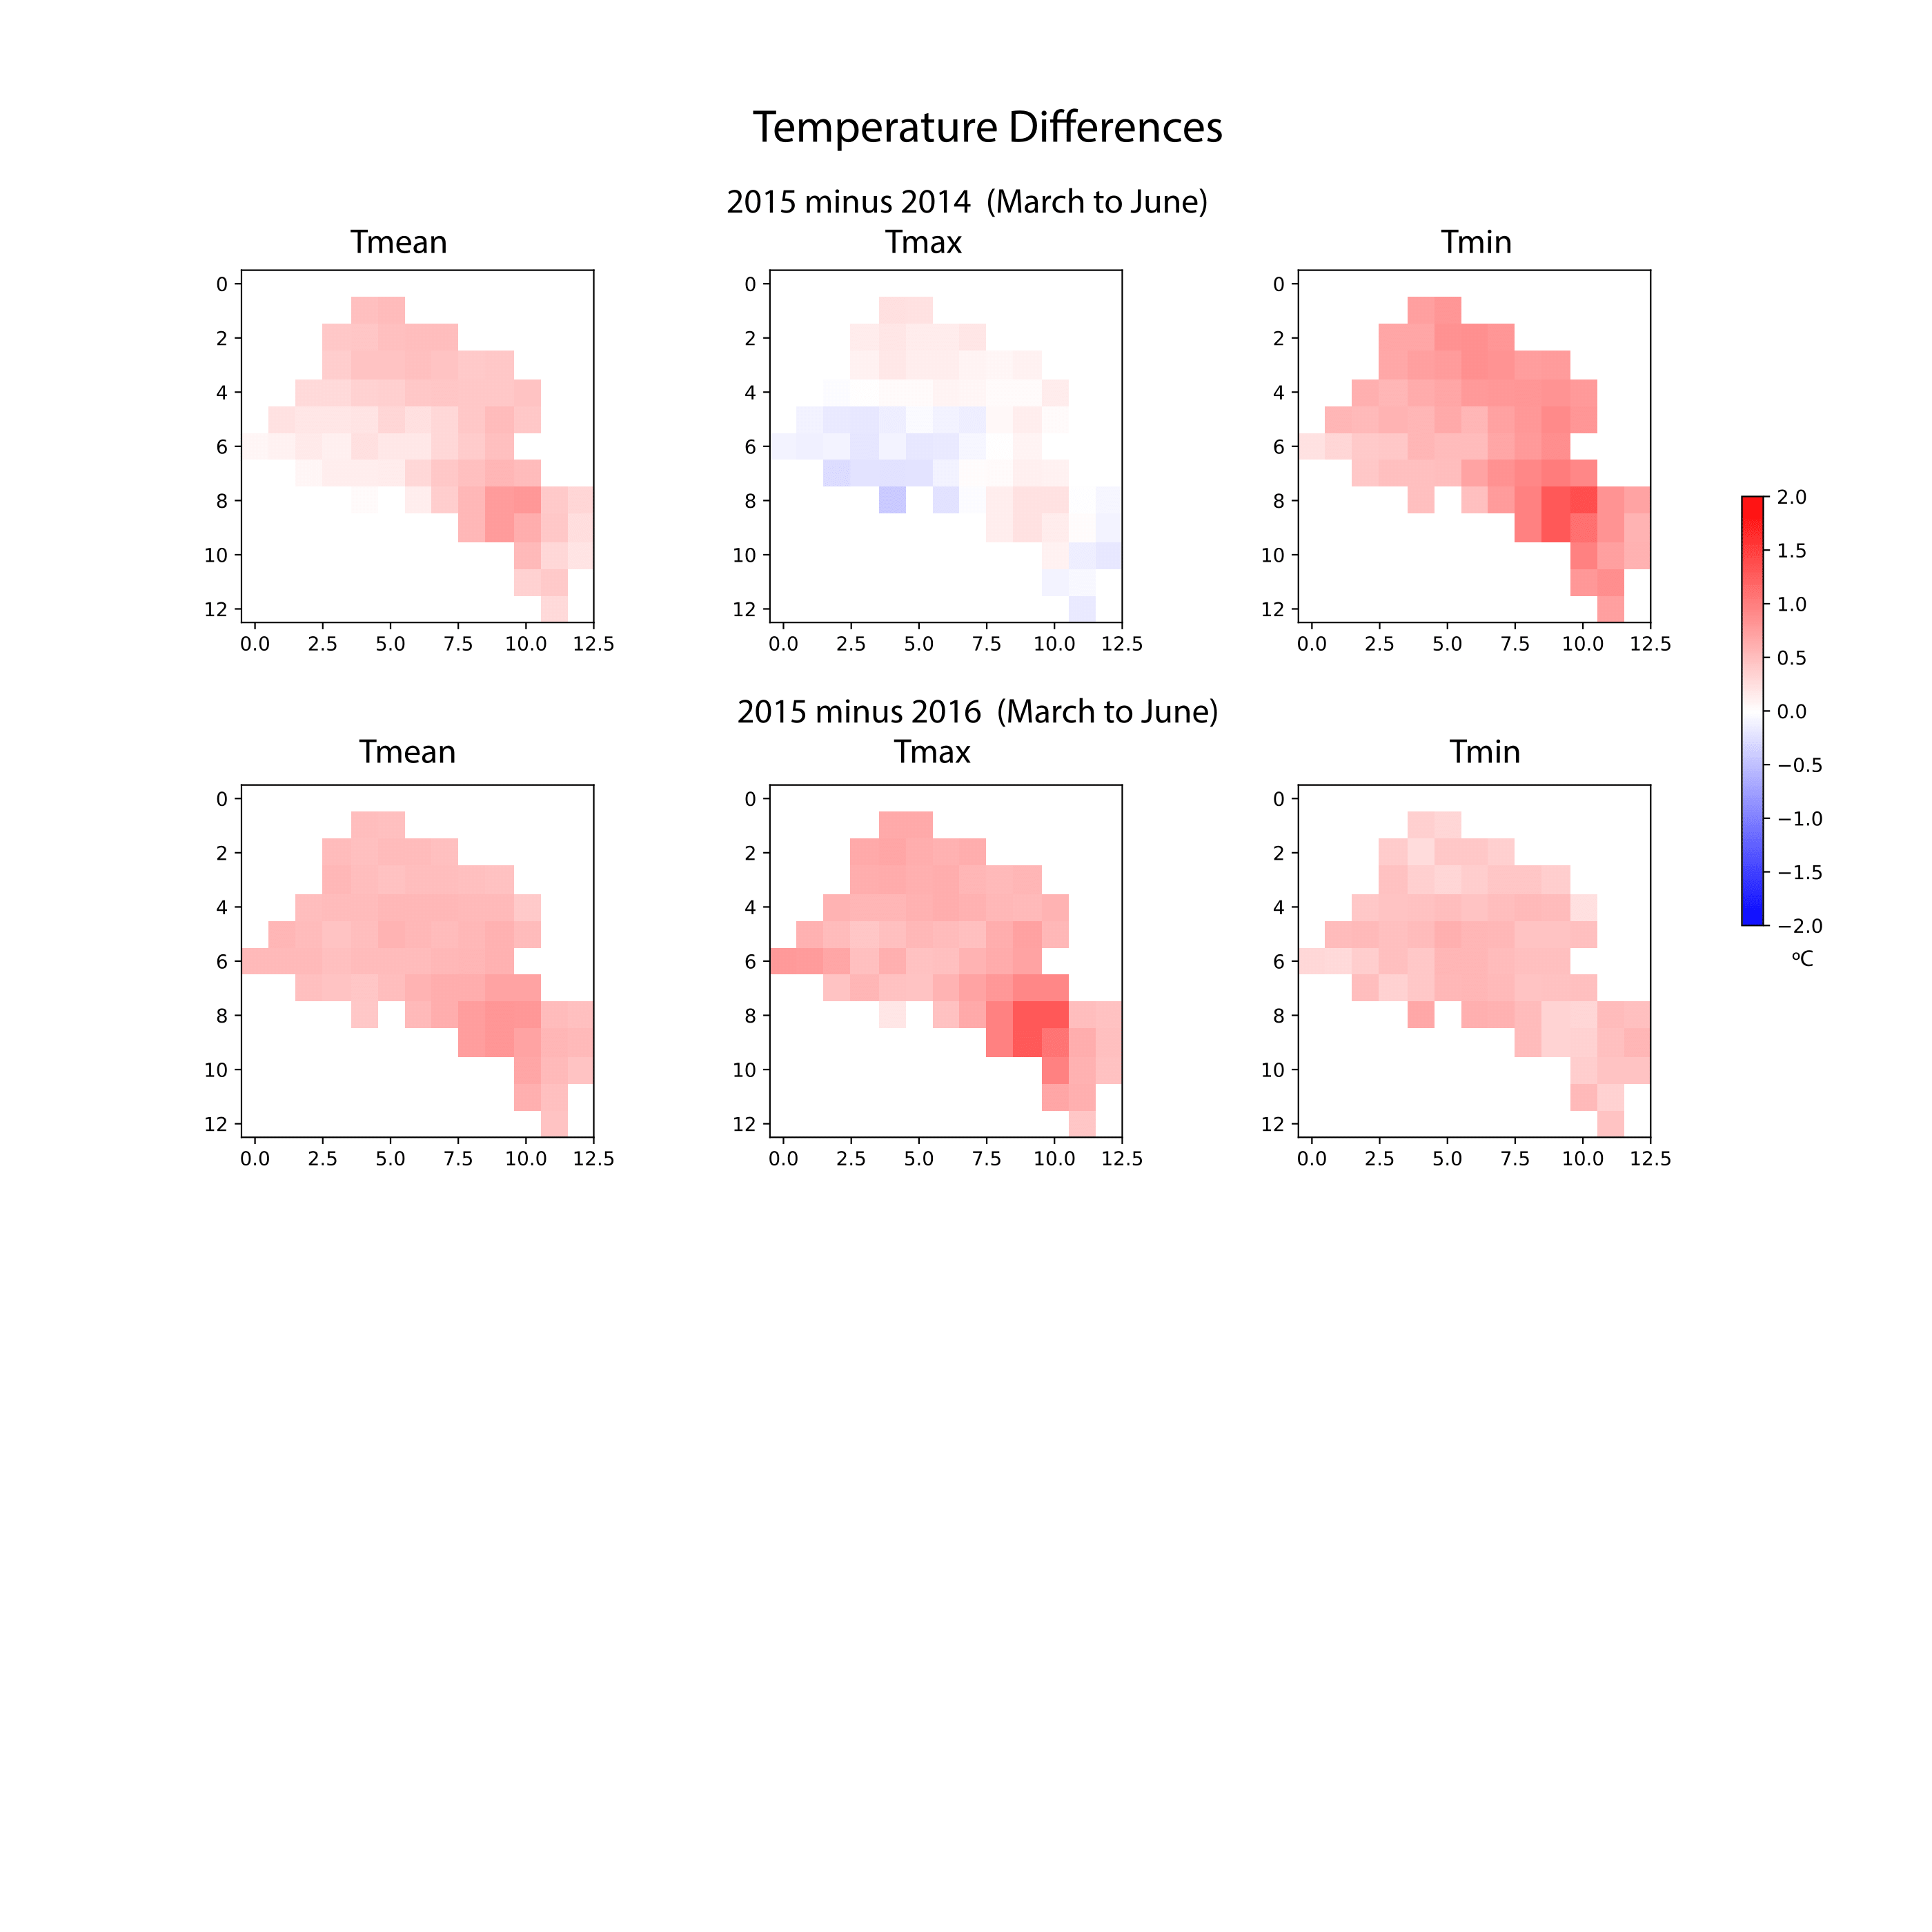

In [4]:
# testing how to load a png file on jupyter notebook
from IPython.display import Image

fig = Image(filename=('./temperature.png'))
fig
